# Food Identification and Classification

Deep Learing is the fastest trending approach for creating machine learning models. It has variety of applications in a myriad of applications. One such application of **deep learning** is **image classification**. There are a lot of image classification model that exists on the internet, and We will create a similar model and train it to classify images of food and not-food. These models have been implemented to classify between cats and dogs, or  birds and not-bird images.

The purpose of this blog is to enable new learners to get familiar with **deep learning using keras** fast and in a simple way. You can design a model yourselves similar to this in less than 10 minutes (Although training the model for the set of images would take longer) for your interest of classification using your own dataset! It really is that easy!

The model can be extended for classification between the food classes, but the scope of this blog is limited to **classification between a food and not-a-food**. 

*Why did I chose food image classification?*
1. I love food. 
2. I initially thought that food classification would be difficult in the sense that most of the dishes look similar. (In my opinion) 
3. Classification between dogs and cats is comparatively easy because they have distinct features. Food on the other hand, dont have any perticular "features" and generally the image of food also have other elements around it, which could make the model less accurate. We will test that through our model.

Our model will be able to achieve a classification accuracy of 92%.

## Why Deep Learning using Keras?
<img src="./MachineLearningvsDeepLearning.png">
1-54 are the different models implemented and tested for a particular dataset, and above are its plotted F1 scores.

*Reference* : https://simonb83.github.io/machine-learning-food-classification.html

If the above visual graph doesnt convience you enough to prefer machine learning over deep learning, there are plenty of articles on the internet to compare the two.

Our model will be using based on **Convolutional Neural Network using Keras with Tensorflow as backend**. Keras makes it really easy to develop a CNN Model since it has predefined libraries for adding layers and defining the various aspects of the model.

#### Important Links:
1. Link to the dataset : https://mmspg.epfl.ch/food-image-datasets
2. Reference to original model on cats and dogs : https://github.com/venkateshtata/cnn_medium./blob/master/cnn.py
3. Reference to sequential model documentation : https://keras.io/getting-started/sequential-model-guide/

## Lets dive straight into our model

 ### Importing Tensorflow and Other Keras Libraries

In [17]:
import tensorflow as tf
import keras

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Dense

### We would be using a sequential classifier for our model

**What is a Sequential Model?**
- As the name suggests, it is a sequence of various layers connected one after the other.

**What does the different layers mean and how can I tweak them?**
- You can refer to the official documentation on different convolutional layers from keras: https://keras.io/layers/convolutional/

In [19]:
# Loading the Sequential model and Initializing
model = Sequential()

### Adding layers to our model

**Convolution** : Convolutional layers convolve around the image to detect edges, lines, blobs of colors and other visual elements. Convolutional layers hyperparameters are the number of filters, filter size, stride, padding and activation functions for introducing non-linearity.

In [20]:
# Step 1 - Convolution, I changed the input shape of the initial model to preserve more information, We will run the model and check if it makes any difference
model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
# Conv2D(filters, shape_of_filters, input_shape, activation_funtion)

**MaxPooling** : Pooling layers reduces the dimensionality of the images by removing some of the pixels from the image. Maxpooling replaces a n x n area of an image with the maximum pixel value from that area to downsample the image.

In [21]:
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

In [22]:
# Adding a second convolutional layer and MaxPooling Layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [23]:
#Adding a third convolutional layer, this time, we add 64 filter to the Conv2D layer and again, a MaxPooling Layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

**Flatten** : Flattens the output of the convolution layers to feed into the Dense layers.

In [24]:
# Step 3 - Flattening
model.add(Flatten())

**Dense** : Dense layers are the traditional fully connected networks that maps the scores of the convolutional layers into the correct labels with some activation function(relu and sigmoid used here)

In [25]:
# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

In [26]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

I refered to this model which was originally implemented for cats and dogs classification :
https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

Refer to the above article if you need detailed explaination on the different layers used.

### Preprocessing the images and Finally running the classifier/model

** Why do we need to preprocess? **

To create synthetic images for the model to take as input. This is mainly done to avoid *overfitting*.
What is *overfitting*?
- Overfitting refers to a model that models the training data too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.
- Reference : https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

##### Important Variables Explained: 
1. **target_size** = Size of image which you want the model to train on. Note that it should be the same as image size specified in the model. You can fiddle around with this value to see if it affects the accuracy and time to achieve it. It is generally set in the powers of 2, although its not a compulsory. I tested around with 64 and 128 sizes, the result was pretty much similar.
2. **batch_size** = Size of batches that you want to feed into the model at a time. It is generally in the powers of 2, but since the number of images in my training and testing set is a multiple of 3, so it felt natural for me to feed in the batch size that is multiple of 3 such that all the batches are uniform.
3. **class_mode** = Since we are classifying the images into to categories(food and not-food), hence we using *binary* classification mode. If We you want to classify the images into a broader categories, you need to use *categorical* classification mode.
4. **steps_per_epoch** = The number of images in the training set.
5. **epochs** = The number of times you want the model to repeat the training and validation. Decreasing this number might not let you train the model to its full extent, and increasing this number might cause the model to overfit.(as explained earlier)
6. **validation_steps** = Number of images in validation/test set.

In [27]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./training',
                                                 target_size = (128, 128),
                                                 batch_size = 30,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('./validation',
                                            target_size = (128, 128),
                                            batch_size = 30,
                                            class_mode = 'binary')

model.fit_generator(training_set,
                         steps_per_epoch = 3000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 1000)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
3000/3000 [==============================] - 3946s 1s/step - loss: 0.1832 - acc: 0.9242 - val_loss: 0.4563 - val_acc: 0.8941
Epoch 2/5
3000/3000 [==============================] - 4213s 1s/step - loss: 0.0429 - acc: 0.9854 - val_loss: 0.5756 - val_acc: 0.9138
Epoch 3/5
3000/3000 [==============================] - 4394s 1s/step - loss: 0.0238 - acc: 0.9917 - val_loss: 0.6368 - val_acc: 0.9081
Epoch 4/5
3000/3000 [==============================] - 4911s 2s/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.6455 - val_acc: 0.9138
Epoch 5/5
3000/3000 [==============================] - 4175s 1s/step - loss: 0.0146 - acc: 0.9954 - val_loss: 0.6616 - val_acc: 0.9220


## Evaluations & Conclusion : 
Once you have run the above cell, depending on the speed of your CPU, the training might take a few hours.

After the model is done training, we can see that the model was able to achieve a high enough accuracy of 92.20% in very short period of time. (or, for less number of epochs itself) Running the model for a greater number of epochs might result in overfitting and running it for lesser number of epochs might not train it enough. You have to find the sweet spot for your dataset by experimenting its various values. For this particular dataset, it seems to be 5.

Though the model seems fairly accurate in numbers and it would classify most of the images correctly, we can still observe that the model fails to classify some fairly obvious images correctly.

This "wrongly-classified-image" doesnt seem to be too harmful for our simple innocent classification, but if this kind of classification is applied to any critical use case, such as predicting if a food is rotten or not, based on extension of our model, and the model predicts rotten substance as safe, it could lead to adverse affects. Thus, deep learning is still far from being used in the real world scenarios where we can rely completely on these models for our day-to-day life.

### Checking the accuracy of model on different images:

##### Food Image

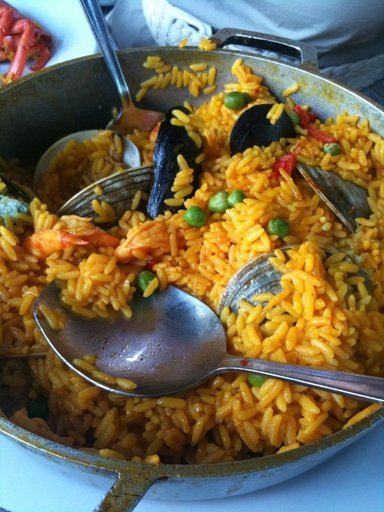

In [28]:
from IPython.display import Image
image = Image('./evaluation/food/1_100.jpg')
image

##### Classification Result : Food

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./evaluation/food/1_100.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'not-food'
else:
    prediction = 'food'
    
prediction

'food'

##### Food Image

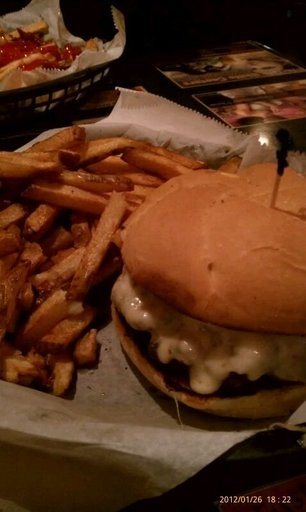

In [30]:
image = Image('./evaluation/food/1_102.jpg')
image

##### Classification Result : Food

In [31]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./evaluation/food/1_102.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'not-food'
else:
    prediction = 'food'
    
prediction

'food'

##### Non- Food Image

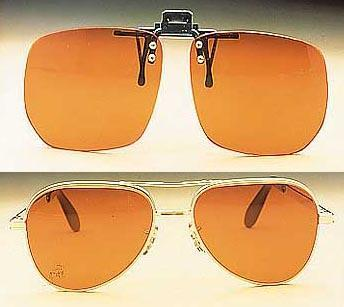

In [40]:
image = Image('./evaluation/not-food/0_45.jpg')
image

##### Classification Result : Food
We can see why the model failed here. If you ask any human being about this image, he would never classify this image as an image of any food, but our model classified this as a food item. Their could be 2 reasons for this:
1. There weren't many images of sunglasses in the training set to train our model to classify this into non-food category.
2. Due to its orange color, and the shape of the glasses, the model could have misunderstood this image as an image of oranges.

In [39]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./evaluation/not-food/0_45.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'not-food'
else:
    prediction = 'food'
    
prediction

'food'

##### Non- Food image
I chose this specific image because to me, it first looked like an image of some sweet eatable. But it obviously is yoyo(I think), and the model predicts it correctly as a non- food image. I thought the model would fail here, but it predicted it correctly!

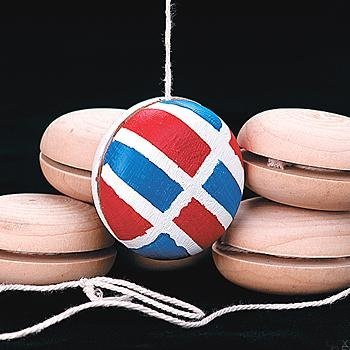

In [34]:
image = Image('./evaluation/not-food/0_55.jpg')
image

##### Classification Result : Non-Food

In [35]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./evaluation/not-food/0_55.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'not-food'
else:
    prediction = 'food'
    
prediction

'not-food'

### ### Bonus Experimental Area ### ###

I tried creating a model below for classification of different food categories. You can use the model and try to train it on your own dataset containing multiple classes for classification. Although be aware that the model requires huge amount of RAM and processing power. I tried training the model on my dataset of size 1GB for classification between 11 classes, but the model ran out of memory. If you have enough memory and good computing power, try running the model and observing the result. I used the Food-11 dataset from [here](https://mmspg.epfl.ch/food-image-datasets). Download and put it inside appropriate folders where this notebook is located. Also note that the images are not classified into different folders. You need to manually put it inside appropriate folders with appropriate folder names.

In [36]:
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units=11,activation="softmax"))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./Food-11/training',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

training_set = keras.utils.to_categorical(training_set,11)

test_set = test_datagen.flow_from_directory('./Food-11/validation',
target_size = (64, 64),
batch_size = 32,
class_mode = 'categorical')

test_set = keras.utils.to_categorical(test_set,11)

classifier.fit_generator(training_set,
steps_per_epoch = 9866,
epochs = 5,
validation_data = test_set,
validation_steps = 3430)

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.

Copyright 2018 **Amish Garhwal**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

The text in the document by Amish Garhwal is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by Amish Garhwal is licensed under the MIT License https://opensource.org/licenses/MIT